<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module2-choose-appropriate-visualizations/LS_DS_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 24.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [157]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [159]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 22:00:38--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.3’

misleading.py.3     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 22:00:38 (143 MB/s) - ‘misleading.py.3’ saved [1258/1258]



### Fix misleading plot #1

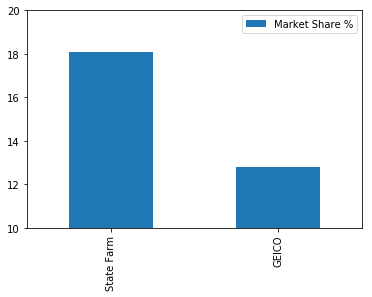

In [160]:
misleading.plot1();

In [103]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})
insurance


,Market Share %
State Farm,18.07
GEICO,12.79


### Fix misleading plot #2

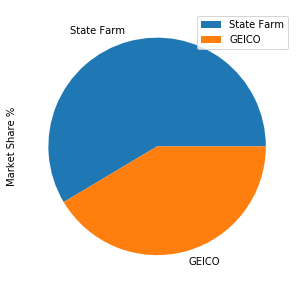

In [104]:
misleading.plot2();

In [105]:
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


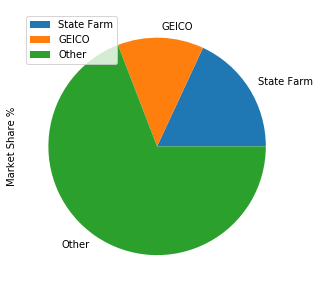

In [106]:
insurance.plot.pie('Market Share %', figsize=(5, 5))

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [108]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [162]:
df.shape

(44, 3)

### See the data

In [163]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [165]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [166]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [167]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [168]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [117]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

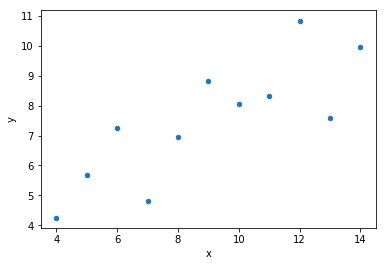

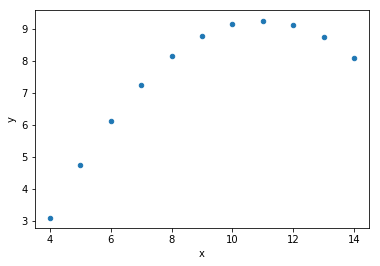

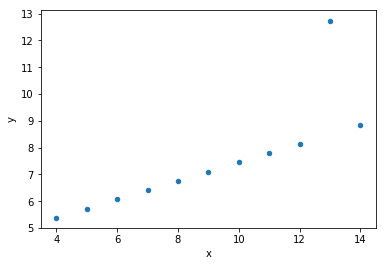

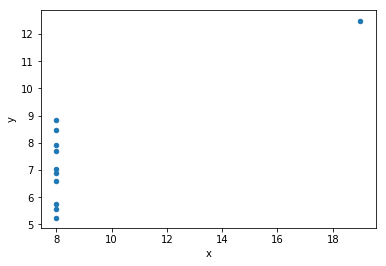

In [169]:
groups.plot('x', 'y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

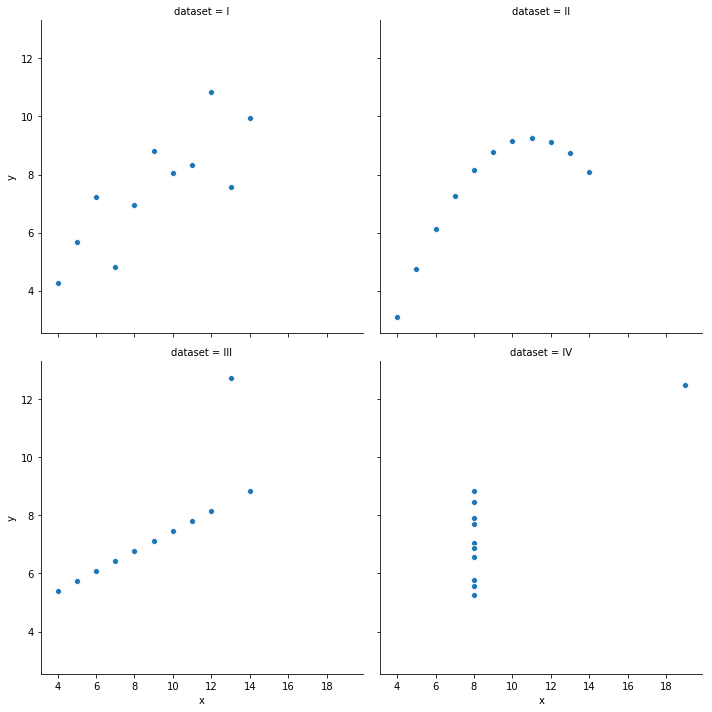

In [119]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

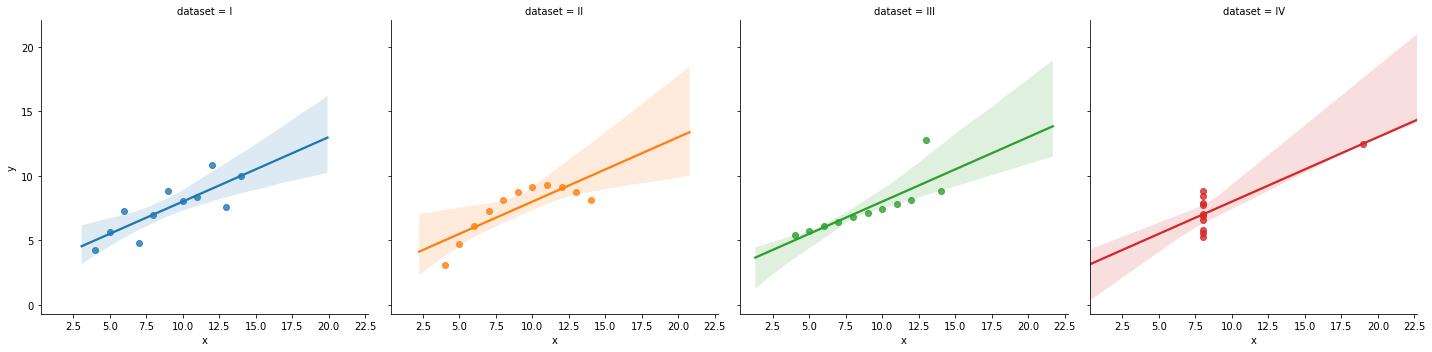

In [171]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', data=df)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [121]:
tips.shape

(244, 7)

### See the first 5 rows

In [123]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [124]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

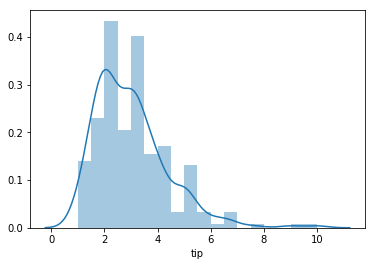

In [173]:
sns.distplot(tips.tip)

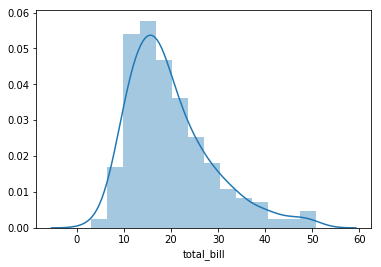

In [126]:
sns.distplot(tips.total_bill)

In [0]:
tips['percent'] = tips['tip'] / tips['total_bill']

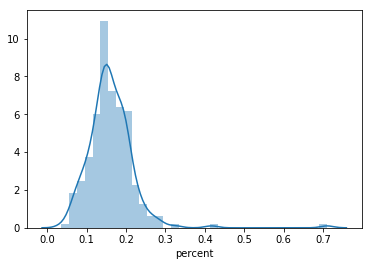

In [128]:
sns.distplot(tips['percent'])

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

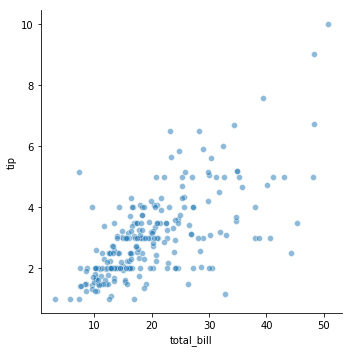

In [129]:
sns.relplot('total_bill', 'tip', data=tips, alpha=.5)

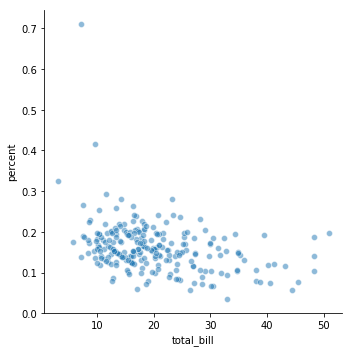

In [130]:
sns.relplot('total_bill', 'percent', data=tips, alpha=.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

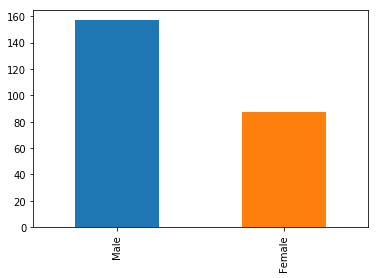

In [131]:
tips['sex'].value_counts().plot.bar()

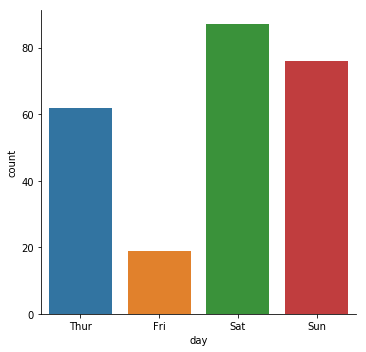

In [132]:
sns.catplot('day', data=tips, kind='count')

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

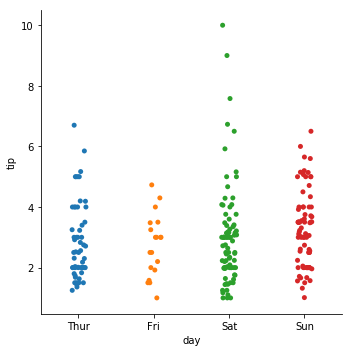

In [133]:
sns.catplot('day', 'tip', data=tips, kind='strip')

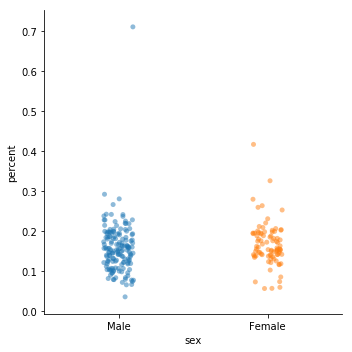

In [134]:
sns.catplot('sex', 'percent', data=tips, kind='strip', alpha=0.5);

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [175]:
flights.shape

(144, 3)

### See the first 5 rows

In [176]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [138]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

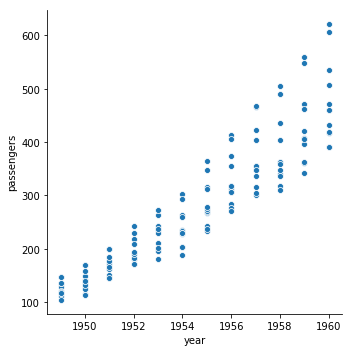

In [177]:
sns.relplot('year', 'passengers', data=flights)

### Plot month & passengers

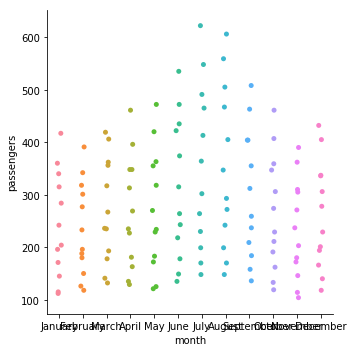

In [178]:
sns.catplot('month', 'passengers', data=flights)

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [179]:
fpt = flights.pivot_table('passengers', 'month', 'year')
fpt

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

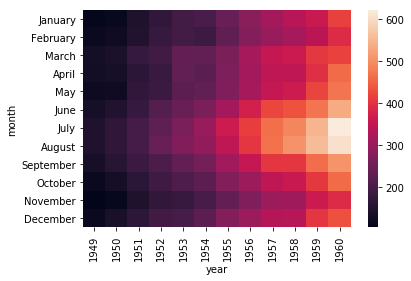

In [142]:
sns.heatmap(fpt)

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
import altair as alt

In [0]:
from vega_datasets import data

In [150]:
st_data = data.stocks()

alt.Chart(st_data).transform_filter(
    alt.datum.symbol != 'GOOG'
).mark_area().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N', sort=['AAPL','AMZN','IBM','MSFT'])
).properties(height=50, width=400)

Chart({
  data:     symbol       date   price
  0     MSFT 2000-01-01   39.81
  1     MSFT 2000-02-01   36.35
  2     MSFT 2000-03-01   43.22
  3     MSFT 2000-04-01   28.37
  4     MSFT 2000-05-01   25.45
  5     MSFT 2000-06-01   32.54
  6     MSFT 2000-07-01   28.40
  7     MSFT 2000-08-01   28.40
  8     MSFT 2000-09-01   24.53
  9     MSFT 2000-10-01   28.02
  10    MSFT 2000-11-01   23.34
  11    MSFT 2000-12-01   17.65
  12    MSFT 2001-01-01   24.84
  13    MSFT 2001-02-01   24.00
  14    MSFT 2001-03-01   22.25
  15    MSFT 2001-04-01   27.56
  16    MSFT 2001-05-01   28.14
  17    MSFT 2001-06-01   29.70
  18    MSFT 2001-07-01   26.93
  19    MSFT 2001-08-01   23.21
  20    MSFT 2001-09-01   20.82
  21    MSFT 2001-10-01   23.65
  22    MSFT 2001-11-01   26.12
  23    MSFT 2001-12-01   26.95
  24    MSFT 2002-01-01   25.92
  25    MSFT 2002-02-01   23.73
  26    MSFT 2002-03-01   24.53
  27    MSFT 2002-04-01   21.26
  28    MSFT 2002-05-01   20.71
  29    MSFT 2002-06-01   22.25
  ..     ...        ...     ...
  530   AAPL 2007-10-01  189.95
  531   AAPL 2007-11-01  182.22
  532   AAPL 2007-12-01  198.08
  533   AAPL 2008-01-01  135.36
  534   AAPL 2008-02-01  125.02
  535   AAPL 2008-03-01  143.50
  536   AAPL 2008-04-01  173.95
  537   AAPL 2008-05-01  188.75
  538   AAPL 2008-06-01  167.44
  539   AAPL 2008-07-01  158.95
  540   AAPL 2008-08-01  169.53
  541   AAPL 2008-09-01  113.66
  542   AAPL 2008-10-01  107.59
  543   AAPL 2008-11-01   92.67
  544   AAPL 2008-12-01   85.35
  545   AAPL 2009-01-01   90.13
  546   AAPL 2009-02-01   89.31
  547   AAPL 2009-03-01  105.12
  548   AAPL 2009-04-01  125.83
  549   AAPL 2009-05-01  135.81
  550   AAPL 2009-06-01  142.43
  551   AAPL 2009-07-01  163.39
  552   AAPL 2009-08-01  168.21
  553   AAPL 2009-09-01  185.35
  554   AAPL 2009-10-01  188.50
  555   AAPL 2009-11-01  199.91
  556   AAPL 2009-12-01  210.73
  557   AAPL 2010-01-01  192.06
  558   AAPL 2010-02-01  204.62
  559   AAPL 2010-03-01  223.02
  
  [560 rows x 3 columns],
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'symbol:N'
    }),
    row: Row({
      shorthand: 'symbol:N',
      sort: ['AAPL', 'AMZN', 'IBM', 'MSFT']
    }),
    x: X({
      shorthand: 'date:T'
    }),
    y: Y({
      shorthand: 'price:Q'
    })
  }),
  height: 50,
  mark: 'area',
  transform: [FilterTransform({
    filter: (datum.symbol !== 'GOOG')
  })],
  width: 400
})

In [153]:
type(st_data)

pandas.core.frame.DataFrame

In [154]:
st_data.shape

(560, 3)

In [155]:
st_data.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [0]:
alt.Chart(fpt).mark_area().encode(
    x=':T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N', sort=['AAPL','AMZN','IBM','MSFT'])
).properties(height=50, width=400)

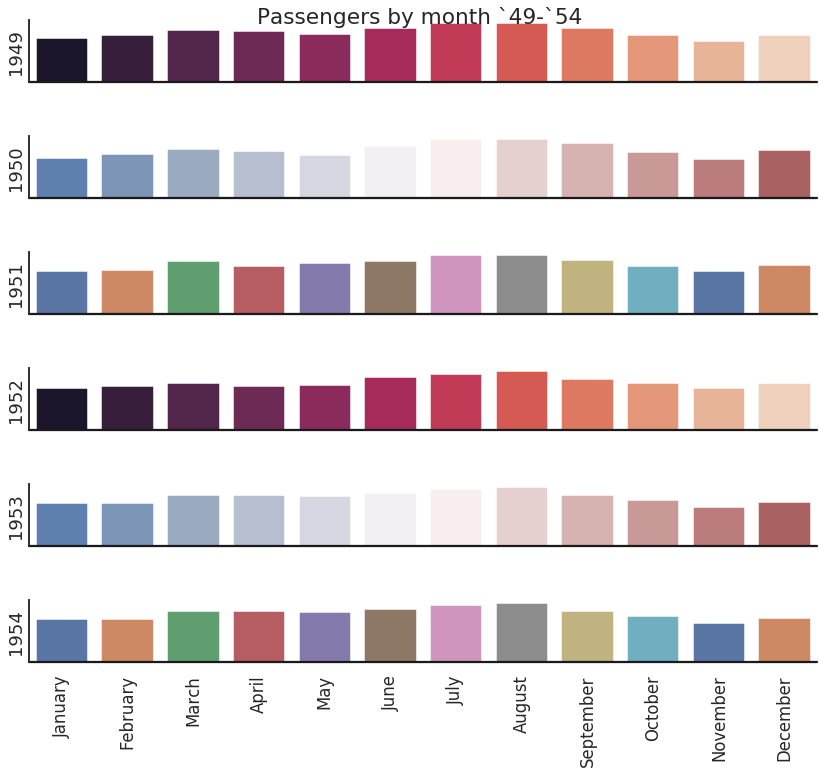

In [239]:
sns.set(style='white', context='talk')

f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(12,10), sharex=True)


x = np.array(fpt.index.tolist())
y1 = fpt.loc[:,1949].values
sns.barplot(x=x, y=y1, palette='rocket', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel('1949')

y2 = fpt.loc[:,1950].values
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel('1950')


# Randomly reorder the data to make it qualitative
y3 = fpt.loc[:,1951].values
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel('1951')

y4 = fpt.loc[:,1952].values
sns.barplot(x=x, y=y4, palette="rocket", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel('1952')

y5 = fpt.loc[:,1953].values
sns.barplot(x=x, y=y5, palette="vlag", ax=ax5)
ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylabel('1953')

y6 = fpt.loc[:,1953].values
sns.barplot(x=x, y=y6, palette="deep", ax=ax6)
ax6.axhline(0, color="k", clip_on=False)
ax6.set_ylabel('1954')

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
f.suptitle('Passengers by month `49-`54')
plt.xticks(rotation=90);

In [189]:
np.array(fpt.index.tolist())

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='<U9')

In [200]:
fpt.loc[:,1949].values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118])

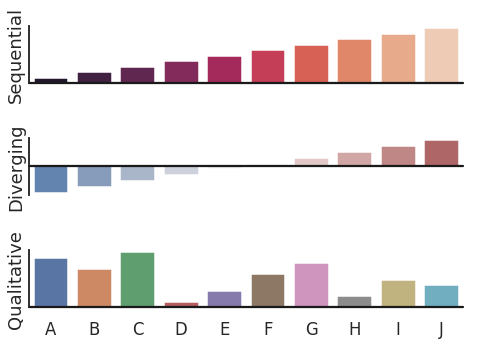

In [180]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)